<a href="https://colab.research.google.com/github/Thaizalu/Aprendizado/blob/main/Desafio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Aula 01

## Desafio: utilizando parâmetros do json_normalize

Ao normalizar o objeto JSON durante a aula passamos simplesmente pd.json_normalize(<dados>) mas o método json_normalize possui diversos parâmetros para trabalhar com estruturas de dados mais complexas.

Você recebeu a tarefa de normalizar o seguinte arquivo JSON chamado “informacoes.json” referente a algumas informações de identificação de um cliente. O arquivo possui o seguinte conteúdo:

Passo 1: carregar o arquivo JSON como um objeto Python

In [1]:
import pandas as pd

In [2]:
informacoes = pd.read_json('/content/informacoes.json')
informacoes

,nome,idade,enderecos
0,João,28,"{'tipo': 'casa', 'rua': 'Rua A', 'numero': 123..."
1,João,28,"{'tipo': 'trabalho', 'rua': 'Rua B', 'numero':..."


In [3]:
import json

with open('informacoes.json') as f:
    dados = json.load(f)

Passo 2: usar o método json_normalize para normalizar os dados de endereço

In [4]:
informacoes = pd.json_normalize(dados, record_path='enderecos', meta=['nome', 'idade'])

Neste passo estamos usando o método json_normalize para normalizar os dados de endereço do objeto JSON dados. O parâmetro record_path é usado para especificar o caminho para os dados que queremos normalizar. No nosso caso, queremos normalizar os dados da lista de endereços, então especificamos 'enderecos'.

O parâmetro meta é usado para especificar quais chaves do objeto original queremos incluir na saída normalizada. No nosso caso, queremos incluir as chaves 'nome' e 'idade' do objeto original.

Resumindo, record_path define qual caminho deve ser seguido para obter os dados que serão normalizados e meta define quais outras chaves devem ser incluídas na tabela normalizada. A variável ’informacoes’ contém os dados que foram normalizados em uma tabela na qual cada linha representa um endereço. As colunas representam os atributos dos endereços, bem como as chaves nome e idade do objeto original.

# Aula 02

Sua tarefa é realizar alguns tratamentos e deixar esse arquivo JSON como um Pandas DataFrame, sem dados vazios e com a tipagem das colunas de forma correta. Como isso pode ser feito?

In [5]:
# abrir o arquivo e carregar o conteúdo do JSON em um objeto Python
dados = pd.read_json('/content/dados.json')

In [6]:
import json

with open('dados.json', 'r') as f:
    dados = json.load(f)

Normalizar o JSON com o método json_normalize

In [7]:
# importando biblioteca pandas
# utilizando o métido json_normalize

import pandas as pd

df = pd.json_normalize(dados, record_path=['pessoas'])

In [8]:
df # verificando o dataframe

,nome,idade,telefones,endereco.rua,endereco.numero,endereco.cidade
0,João,25,"[11 1111-1111, 11 2222-2222]",Rua A,123,São Paulo
1,Maria,30,[21 3333-3333],,456,Rio de Janeiro


Fazer o cast das colunas para suas tipagens corretas

In [9]:
# analisando os tipos de dados do dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   nome             2 non-null      object
 1   idade            2 non-null      object
 2   telefones        2 non-null      object
 3   endereco.rua     2 non-null      object
 4   endereco.numero  2 non-null      int64 
 5   endereco.cidade  2 non-null      object
dtypes: int64(1), object(5)
memory usage: 224.0+ bytes


In [10]:
# fazer o cast da coluna idade para inteiro
df['idade'] = df['idade'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   nome             2 non-null      object
 1   idade            2 non-null      int64 
 2   telefones        2 non-null      object
 3   endereco.rua     2 non-null      object
 4   endereco.numero  2 non-null      int64 
 5   endereco.cidade  2 non-null      object
dtypes: int64(2), object(4)
memory usage: 224.0+ bytes


Realize o filtro e remoção dos dados com valores vazios

In [11]:
#filtro para as amostras que possuem um valor diferente de vazio na coluna endereco.rua
# salvando em outro dataframe
df_filtrado = df.query('`endereco.rua` != ""')

In [12]:
# outra forma e filtrar
df_filtrado = df[df['endereco.rua'] != ""]
df_filtrado

,nome,idade,telefones,endereco.rua,endereco.numero,endereco.cidade
0,João,25,"[11 1111-1111, 11 2222-2222]",Rua A,123,São Paulo


# Aula 03

Para facilitar a análise dos dados de cadastro de cursos de uma plataforma, você recebeu um arquivo chamado cursos_cadastrados.json. Você foi informado que esses dados podem apresentar problemas que podem prejudicar a análise e interpretação correta dos dados.

Para resolver isso, foi solicitado que você identifique e remova as amostras que apresentam os seguintes problemas:

* Valores nulos: são valores ausentes em algumas das colunas que devem ser preenchidos para que a análise seja correta.
* Duplicatas: registros iguais que podem prejudicar a análise dos dados, já que estão representando a mesma informação.
* Strings vazias: valores de texto que não apresentam nenhum conteúdo escrito, o que pode dificultar a análise de dados, principalmente se a coluna tiver muitos valores assim.
* Conversão de tipos: algumas colunas do arquivo podem estar no tipo de dados errado, como texto em vez de número, o que pode prejudicar a análise. Nesse caso você deve realizar a conversão para o tipo correto de cada coluna.

Dentro desse contexto, você precisará de uma abordagem sistemática para limpar os dados. Assim, como isso pode ser feito?

In [13]:
# Importando as bibliotecas necessárias
import pandas as pd
import json

# carrega o conjunto de dados
data = pd.read_json('/content/cursos_cadastrados.json')
with open('cursos_cadastrados.json', 'r') as f:
    data = json.load(f)

# normaliza o json
df = pd.json_normalize(data)

# exibe o DataFrame resultante
print(df)


                             curso      categoria carga_horaria concluintes  \
0         Introdução à programação    Programação      20 horas         100   
1            Excel para iniciantes  Produtividade          None        None   
2  Marketing digital para negócios      Marketing      30 horas          75   
3          Inteligência artificial    Programação      40 horas               
4             Inglês para negócios        Idiomas      20 horas          30   
5         Introdução à programação    Programação      20 horas         100   

  data_inicio data_conclusao  \
0  2022-01-01     2022-01-20   
1        None           None   
2  2022-03-01     2022-03-31   
3  2022-04-01                  
4                              
5  2022-01-01     2022-01-20   

                                           descricao  preco  instrutor.nome  \
0        Curso introdutório à programação com Python  99.90      João Silva   
1                                               None   None  Ma

Esse código em Python é responsável por carregar um arquivo JSON contendo dados sobre cursos cadastrados e exibi-los em um DataFrame, utilizando a biblioteca Pandas.

A primeira etapa é importar as bibliotecas necessárias para o código: pandas e json. Em seguida, o arquivo JSON é carregado usando a função json.load(). O arquivo em questão é denominado 'cursos_cadastrados.json' e é aberto no modo de leitura (r) para que possa ser lido.

Depois que o arquivo JSON é carregado, a função pd.json_normalize() é utilizada para transformar o JSON em um DataFrame do Pandas. Isso permite que os dados sejam manipulados e analisados de forma mais fácil e eficiente. Por fim, o DataFrame resultante é exibido com o comando print(df).

Identificar e remover amostras com valores nulos

In [14]:
#  verificar se há dados nulos no conjunto de dados utilizando o código a seguir
df.isnull().sum().sum()


6

In [15]:
df[df.isna().any(axis=1)]


,curso,categoria,carga_horaria,concluintes,data_inicio,data_conclusao,descricao,preco,instrutor.nome,instrutor.email,instrutor.telefone
1,Excel para iniciantes,Produtividade,None,None,None,None,None,None,Maria Oliveira,maria.oliveira@emailaleatorio.com,(11) 8888-8888


O código df[df.isna().any(axis=1)] é utilizado para retornar um subconjunto do DataFrame df, contendo apenas as linhas que possuem pelo menos um valor ausente (NaN - Not a Number).

Para entender o código, vamos dividi-lo em partes:

* df.isna() retorna um DataFrame com a mesma forma que df, contendo valores booleanos indicando quais elementos do DataFrame df são valores ausentes (NaN).
* df.isna().any(axis=1) retorna uma série booleana que indica se cada linha do DataFrame df contém pelo menos um valor ausente. O parâmetro axis=1 indica que a verificação deve ser feita por linha.
* df[df.isna().any(axis=1)] utiliza a série booleana retornada na etapa anterior como índice para o DataFrame df, retornando apenas as linhas que possuem pelo menos um valor ausente.

Agora vamos realizar a remoção dessa amostra com o código:

In [16]:
df.dropna(inplace=True)

O trecho de código df.dropna(inplace=True) é utilizado para remover todas as linhas do DataFrame df que contenham valores ausentes (NaN - Not a Number). O parâmetro inplace=True é utilizado para indicar que a alteração deve ser feita diretamente no objeto DataFrame df sem criar uma cópia do DataFrame com as linhas removidas.

Identificar e remover amostras com valores duplicados

In [17]:
df.duplicated()

0    False
2    False
3    False
4    False
5     True
dtype: bool

In [18]:
# remover a amostra duplicada
df.drop_duplicates(inplace=True)

O código df.drop_duplicates(inplace=True) é utilizado para remover as linhas duplicadas do DataFrame df. O parâmetro inplace=True é utilizado para indicar que a alteração deve ser feita diretamente no objeto DataFrame df sem criar uma cópia do DataFrame com as linhas duplicadas removidas. Já o método drop_duplicates() remove as linhas que têm exatamente os mesmos valores em todas as colunas, mantendo apenas a primeira ocorrência e descartando as duplicatas subsequentes.

Remover as amostras com strings vazias
Vamos verificar onde tem amostras com strings vazias. Para isso, observamos duas colunas, começando pela coluna "instrutor.nome":

In [19]:
df[df['instrutor.nome'] == ""]

,curso,categoria,carga_horaria,concluintes,data_inicio,data_conclusao,descricao,preco,instrutor.nome,instrutor.email,instrutor.telefone
3,Inteligência artificial,Programação,40 horas,,2022-04-01,,Curso avançado sobre inteligência artificial c...,129.9,,contato@emailaleatorio.com,


In [20]:
# coluna data conclusão
df[df['data_conclusao'] == ""]

,curso,categoria,carga_horaria,concluintes,data_inicio,data_conclusao,descricao,preco,instrutor.nome,instrutor.email,instrutor.telefone
3,Inteligência artificial,Programação,40 horas,,2022-04-01,,Curso avançado sobre inteligência artificial c...,129.9,,contato@emailaleatorio.com,
4,Inglês para negócios,Idiomas,20 horas,30,,,Curso de inglês para negócios,69.9,John Smith,,


Percebemos que, para verificar se há strings vazias em cada coluna, teríamos que fazer uma verificação manualmente. Para tornar esse processo mais automatizado, podemos fazer a substituição desses valores por NaN.

Dessa forma, podemos trabalhar com as strings vazias de forma mais fácil, utilizando os métodos do Pandas que são projetados para lidar com valores nulos, como o método dropna. Esse método nos permite eliminar linhas ou colunas que contenham valores nulos, o que pode ser muito útil para limpar os dados e garantir que eles estejam prontos para serem analisados.

In [21]:
# Substitui strings vazias por valores nulos
df.replace('', pd.NA, inplace=True)

In [22]:
# removendo amostras com valor NA
df.dropna(inplace=True)
print(df)


                             curso    categoria carga_horaria concluintes  \
0         Introdução à programação  Programação      20 horas         100   
2  Marketing digital para negócios    Marketing      30 horas          75   

  data_inicio data_conclusao                                    descricao  \
0  2022-01-01     2022-01-20  Curso introdutório à programação com Python   
2  2022-03-01     2022-03-31              Curso introdutório em marketing   

   preco instrutor.nome                instrutor.email instrutor.telefone  
0  99.90     João Silva  joao.silva@emailaleatorio.com     (11) 9999-9999  
2   89.9     Ana Santos  ana.santos@emailaleatorio.com     (11) 7777-7777  


Fazer o cast das colunas para seus tipos corretos

Primeiro, vamos verificar o tipo em que as colunas estão:

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2 entries, 0 to 2
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   curso               2 non-null      object
 1   categoria           2 non-null      object
 2   carga_horaria       2 non-null      object
 3   concluintes         2 non-null      object
 4   data_inicio         2 non-null      object
 5   data_conclusao      2 non-null      object
 6   descricao           2 non-null      object
 7   preco               2 non-null      object
 8   instrutor.nome      2 non-null      object
 9   instrutor.email     2 non-null      object
 10  instrutor.telefone  2 non-null      object
dtypes: object(11)
memory usage: 192.0+ bytes


E fazemos o cast para seus tipos corretos:

In [24]:
# Converte a concluintes para o tipo inteiro
df['concluintes'] = df['concluintes'].astype(int)

# Converte a coluna data_inicio e data_conclusao para o tipo datetime
df['data_inicio'] = pd.to_datetime(df['data_inicio'])
df['data_conclusao'] = pd.to_datetime(df['data_conclusao'])

# Convertendo a coluna preço para o tipo float
df['preco'] = df['preco'].astype(float)


Essas conversões são importantes para garantir que os tipos de dados das colunas estejam corretos para a realização de operações matemáticas ou análises estatísticas em um dataframe. Se os tipos de dados estiverem incorretos, as operações podem gerar resultados inesperados ou erros.

Agora, verificamos se a conversão funcionou corretamente:

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2 entries, 0 to 2
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   curso               2 non-null      object        
 1   categoria           2 non-null      object        
 2   carga_horaria       2 non-null      object        
 3   concluintes         2 non-null      int64         
 4   data_inicio         2 non-null      datetime64[ns]
 5   data_conclusao      2 non-null      datetime64[ns]
 6   descricao           2 non-null      object        
 7   preco               2 non-null      float64       
 8   instrutor.nome      2 non-null      object        
 9   instrutor.email     2 non-null      object        
 10  instrutor.telefone  2 non-null      object        
dtypes: datetime64[ns](2), float64(1), int64(1), object(7)
memory usage: 192.0+ bytes


# Aula 04

Você trabalha em um banco como cientista de dados e recebeu o seguinte conjunto de dados para analisar:

In [26]:
import pandas as pd

# criando um DataFrame com 30 transações aleatórias
df = pd.DataFrame({
    'ID da transação': range(1, 31),
    'Valor da transação': [100, 200, 150, 500, 300, 913, 250, 400, 200, 150,
                           200, 200, 400, 300, 150, 301, 805, 300, 400, 250,
                           150, 100, 500, 600, 200, 350, 100, 250, 800, 250],
    'Data da transação': pd.date_range(start='2022-01-01', end='2022-01-30', freq='D'),
    'Local da transação': ['São Paulo, Brasil', 'Rio de Janeiro, Brasil', 'Belo Horizonte, Brasil', 'São Paulo, Brasil',
                           'São Paulo, Brasil', 'Nova Iorque, EUA', 'São Paulo, Brasil', 'São Paulo, Brasil', 'São Paulo, Brasil',
                           'Rio de Janeiro, Brasil', 'São Paulo, Brasil', 'São Paulo, Brasil', 'São Paulo, Brasil', 'São Paulo, Brasil',
                           'São Paulo, Brasil', 'São Paulo, Brasil', 'Los Angeles, EUA', 'São Paulo, Brasil', 'São Paulo, Brasil', 'São Paulo, Brasil',
                           'São Paulo, Brasil', 'São Paulo, Brasil', 'São Paulo, Brasil', 'São Paulo, Brasil', 'São Paulo, Brasil', 'São Paulo, Brasil',
                           'São Paulo, Brasil', 'São Paulo, Brasil', 'Miami, EUA', 'São Paulo, Brasil']
})

Foi informado que nessa base de dados há possíveis fraudes que podem ser identificadas através dos outliers no “valor da transação”. Basicamente a fraude seria um outlier.

Sua missão é construir uma função que recebe dois parâmetros, a coluna que você quer analisar se tem outlier e o DataFrame em questão. A intenção de fazer isso é aproveitar novamente essa função tanto para outras colunas quanto para outros DataFrames futuramente em outras análises. O método que deve ser implementado para identificação do outlier é do intervalo interquartil.

Como podemos fazer isso?

In [27]:
def calc_outliers(column, dataframe):

  # calculando o IQR e definindo o limite para outliers
  Q1 = dataframe[column].quantile(0.25)
  Q3 = dataframe[column].quantile(0.75)
  IQR = Q3 - Q1
  limite_inferior = Q1 - 1.5 * IQR
  limite_superior = Q3 + 1.5 * IQR

  # identificando os outliers
  outliers = dataframe[(dataframe[column] < limite_inferior) | (dataframe[column] > limite_superior)]

  # retornando os outliers
  return outliers

Esse código em Python define uma função chamada calc_outliers que recebe dois parâmetros: column e dataframe. A função tem como objetivo identificar e retornar os outliers (valores extremos) de uma coluna específica em um DataFrame.

O primeiro passo da função é calcular o IQR (Interquartile Range) da coluna, que é a diferença entre o terceiro (Q3) e o primeiro quartil (Q1). Em seguida, é definido um limite inferior e um limite superior para identificar os outliers. Esses limites são calculados subtraindo e somando, respectivamente, 1.5 vezes o IQR ao Q1 e ao Q3. A imagem abaixo exemplifica isso:

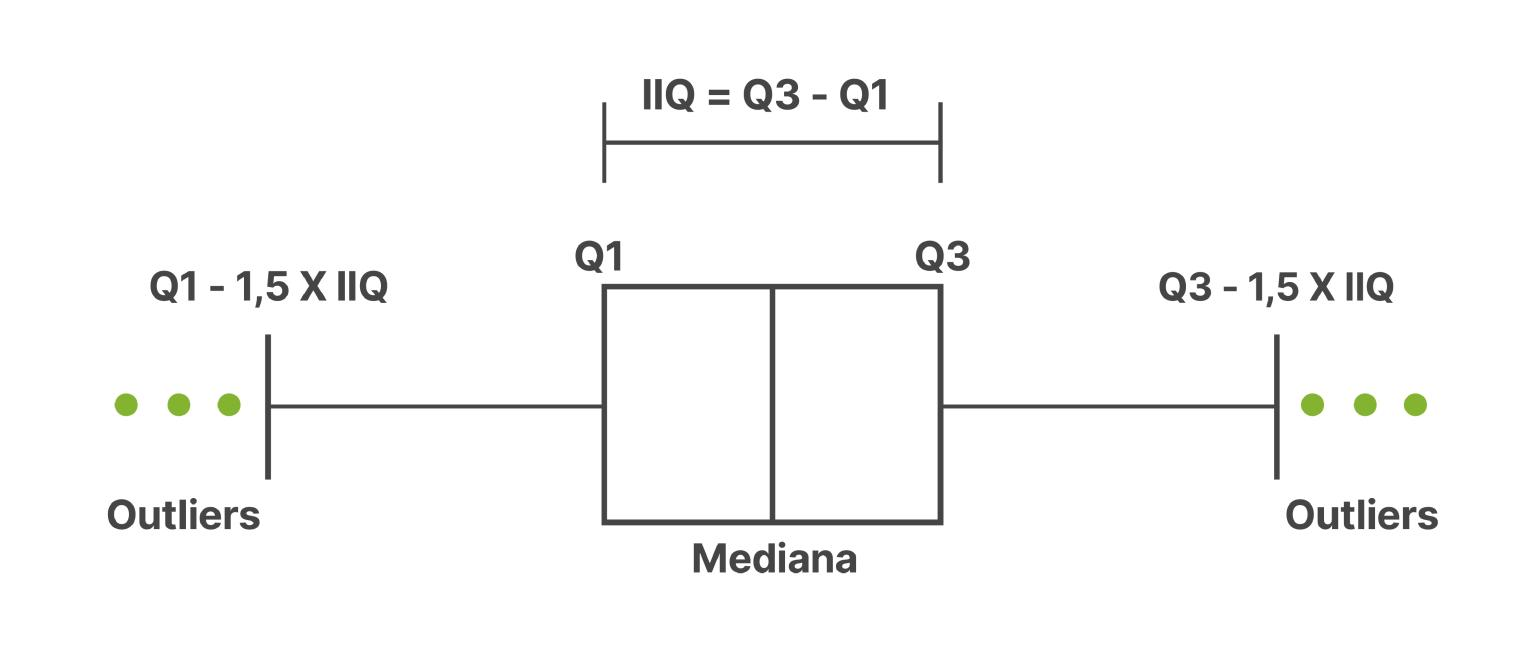

Após definir os limites, a função identifica os outliers na coluna do DataFrame utilizando a condição de que os valores sejam menores que o limite inferior ou maiores que o limite superior. Por fim, a função retorna um novo DataFrame contendo apenas os outliers identificados.

Vamos então obter as amostras que são outliers na coluna “Valor da transação” no conjunto de dados fornecido:

In [28]:
print(calc_outliers('Valor da transação', df))

    ID da transação  Valor da transação Data da transação Local da transação
5                 6                 913        2022-01-06   Nova Iorque, EUA
16               17                 805        2022-01-17   Los Angeles, EUA
28               29                 800        2022-01-29         Miami, EUA


Logo, essas são as 3 transações fraudulentas presentes nos dados fornecidos.